In [50]:
import pandas as pd
import numpy as np
import igraph as ig
import matplotlib.pyplot as plt 

In [51]:
df_unweighted = pd.read_csv('combined_final_unweighted.csv')
df_unweighted

,node_start,node_end,status
0,Hong Kong,Samoa,jurisdiction
1,Hong Kong,Samoa,jurisdiction
2,Hong Kong,Samoa,jurisdiction
3,Hong Kong,Samoa,jurisdiction
4,Hong Kong,Samoa,jurisdiction
...,...,...,...
338127,Indonesia,British Virgin Islands,officer_base
338128,Cook Islands,British Virgin Islands,officer_base
338129,Hong Kong,British Virgin Islands,officer_base
338130,Cook Islands,United Kingdom,officer_base


In [52]:
df_weighted = pd.read_csv('combined_final_weighted.csv')
df_weighted

,node_start,node_end,status,weight
0,Hong Kong,Samoa,jurisdiction,2.0
1,Hong Kong,Samoa,jurisdiction,2.0
2,Hong Kong,Samoa,jurisdiction,2.0
3,Hong Kong,Samoa,jurisdiction,2.0
4,Hong Kong,Samoa,jurisdiction,2.0
...,...,...,...,...
338119,Indonesia,British Virgin Islands,officer_base,1.0
338120,Cook Islands,British Virgin Islands,officer_base,1.0
338121,Hong Kong,British Virgin Islands,officer_base,1.0
338122,Cook Islands,United Kingdom,officer_base,1.0


In [53]:
df_undir = pd.read_csv('undirected_weighted_grouped.csv')
df_undir

,node_1,node_2,weight
0,Albania,Bahamas,4.0
1,Algeria,British Virgin Islands,2.0
2,Algeria,United Kingdom,2.0
3,Algeria,United States,1.0
4,Andorra,Bahamas,52.0
...,...,...,...
2383,Hong Kong,Zimbabwe,3.0
2384,Jersey,Zimbabwe,1.0
2385,Panama,Zimbabwe,6.0
2386,Russia,Zimbabwe,2.0


In [54]:
#plot the unweighted graph (try unweighted first)
g = ig.Graph.TupleList(df_undir.itertuples(index=False), directed=False, edge_attrs={'weight': "weight"})


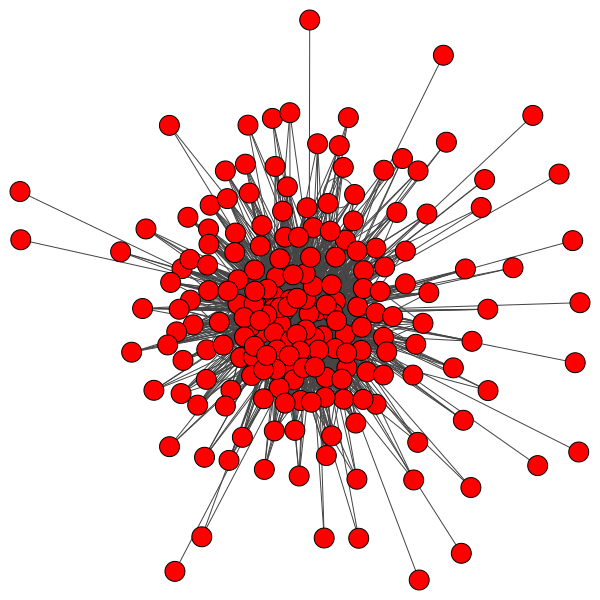

In [55]:
ig.plot(g)

In [56]:
g.diameter()

3

In [57]:
len(g.vs.indices)

196

In [58]:
#g.vs.indices
df_undir['node_1'].value_counts()

British Virgin Islands    158
Bahamas                    95
Hong Kong                  90
China                      88
Cyprus                     81
                         ... 
Slovakia                    1
Honduras                    1
Senegal                     1
Dubai                       1
French Guiana               1
Name: node_1, Length: 172, dtype: int64

In [59]:
uni =df_undir['node_1'].unique()

In [60]:
len(uni)

172

In [61]:
list(g.vs)

[igraph.Vertex(<igraph.Graph object at 0x7f872ca26d60>, 0, {'name': 'Albania'}),
 igraph.Vertex(<igraph.Graph object at 0x7f872ca26d60>, 1, {'name': 'Bahamas'}),
 igraph.Vertex(<igraph.Graph object at 0x7f872ca26d60>, 2, {'name': 'Algeria'}),
 igraph.Vertex(<igraph.Graph object at 0x7f872ca26d60>, 3, {'name': 'British Virgin Islands'}),
 igraph.Vertex(<igraph.Graph object at 0x7f872ca26d60>, 4, {'name': 'United Kingdom'}),
 igraph.Vertex(<igraph.Graph object at 0x7f872ca26d60>, 5, {'name': 'United States'}),
 igraph.Vertex(<igraph.Graph object at 0x7f872ca26d60>, 6, {'name': 'Andorra'}),
 igraph.Vertex(<igraph.Graph object at 0x7f872ca26d60>, 7, {'name': 'Cayman Islands'}),
 igraph.Vertex(<igraph.Graph object at 0x7f872ca26d60>, 8, {'name': 'Cook Islands'}),
 igraph.Vertex(<igraph.Graph object at 0x7f872ca26d60>, 9, {'name': 'Costa Rica'}),
 igraph.Vertex(<igraph.Graph object at 0x7f872ca26d60>, 10, {'name': 'Hong Kong'}),
 igraph.Vertex(<igraph.Graph object at 0x7f872ca26d60>, 11, {'n

In [62]:
##similar to mini-proj, try a random target 
import random
random.seed(5104)
def unweighted_Type1_random_delete(G):
    g = G.copy()
    
    nodes_removed =[]
    prop_removed =[]
    dia = []
    assort_deg = []
    degree = []
    density = []
    apl = []
    bet = []
    for i in range(len(g.vs)):
        sample = random.sample(g.vs.indices,1)
        #print(sample)
        g.delete_vertices(sample)
        
        diameter = g.diameter(directed=True)
        dia.append(diameter)
        
        asdeg = g.assortativity_degree()
        assort_deg.append(asdeg)
        
        between = g.betweenness(directed=True)
        bet.append(between)
        
        dense = g.density(loops=True)
        density.append(dense)
        #try in-degree
        deg = g.indegree()
        deg = sum(deg)/max(len(deg),1)
        degree.append(deg)
        
        avgpl = g.average_path_length()
        apl.append(avgpl)
        
        prop = round((i+1)/196,2)
        prop_removed.append(prop)
        nodes_removed.append(i+1)
        
        


    df = pd.DataFrame({'nodes_removed':nodes_removed,
                       'betweenness':bet,
                       'prop_removed':prop_removed,
                       'diameter':dia,
                       'assortativity_degree':assort_deg,
                       'avg_indegree':degree,
                       'density':density,
                       'average_path_len':apl})
    
    return(df)

In [63]:
#try another function but this time with g.diameter having weight param 
#https://igraph.org/python/api/latest/igraph._igraph.GraphBase.html#diameter

random.seed(5104)
def weighted_Type1_random_delete(G):
    g = G.copy()
    
    nodes_removed =[]
    prop_removed =[]
    dia = []
    assort_deg = []
    degree = []
    density = []
    apl = []
    bet = []
    for i in range(len(g.vs)):
        sample = random.sample(g.vs.indices,1)
        #print(sample)
        g.delete_vertices(sample)
        
        diameter = g.diameter(directed=True, weights='weight')
        dia.append(diameter)
        
        asdeg = g.assortativity_degree()
        assort_deg.append(asdeg)
        
        between = g.betweenness(directed=True, weights='weight')
        bet.append(between)
        
        dense = g.density(loops=True)
        density.append(dense)
        #try in-degree
        deg = g.indegree()
        deg = sum(deg)/max(len(deg),1)
        degree.append(deg)
        
        avgpl = g.average_path_length()
        apl.append(avgpl)
        
        prop = round((i+1)/196,2)
        prop_removed.append(prop)
        nodes_removed.append(i+1)
        
        


    df = pd.DataFrame({'nodes_removed':nodes_removed,
                       'prop_removed':prop_removed,
                       'diameter':dia,
                       'betweenness':bet,
                       'assortativity_degree':assort_deg,
                       'avg_indegree':degree,
                       'density':density,
                       'average_path_len':apl})
    
    return(df)

In [64]:
df_type1_unweighted = unweighted_Type1_random_delete(g)
df_type1_unweighted.head()

,nodes_removed,betweenness,prop_removed,diameter,assortativity_degree,avg_indegree,density,average_path_len
0,1,"[0.0, 590.8710039486392, 0.0, 4899.79294722460...",0.01,3.0,-0.556315,24.205128,0.123496,1.915517
1,2,"[0.0, 589.5128958405311, 0.0, 4808.02267695434...",0.01,3.0,-0.556133,24.288660,0.124557,1.914214
2,3,"[0.0, 588.2628958405311, 0.0, 4761.19172457338...",0.02,3.0,-0.555478,24.341969,0.125474,1.913428
3,4,"[0.0, 577.4243677020025, 0.0, 4725.39320364986...",0.02,3.0,-0.554013,24.343750,0.126133,1.913067
4,5,"[0.0, 561.3549651239045, 0.0, 4664.19522964319...",0.03,3.0,-0.553574,24.376963,0.126963,1.912428


In [65]:
df_type1_unweighted.tail()

,nodes_removed,betweenness,prop_removed,diameter,assortativity_degree,avg_indegree,density,average_path_len
191,192,"[0.0, 0.0, 0.0, 0.0]",0.98,0.0,NaN,0.0,0.0,NaN
192,193,"[0.0, 0.0, 0.0]",0.98,0.0,NaN,0.0,0.0,NaN
193,194,"[0.0, 0.0]",0.99,0.0,NaN,0.0,0.0,NaN
194,195,[0.0],0.99,0.0,NaN,0.0,0.0,NaN
195,196,[],1.00,NaN,NaN,0.0,NaN,NaN


In [66]:
df_type1_weighted = weighted_Type1_random_delete(g)
df_type1_weighted.head()

,nodes_removed,prop_removed,diameter,betweenness,assortativity_degree,avg_indegree,density,average_path_len
0,1,0.01,26.0,"[0.0, 233.33022725154777, 2.101449275362319, 2...",-0.555287,24.420513,0.124594,1.913931
1,2,0.01,26.0,"[0.0, 232.85577597183334, 2.101449275362319, 2...",-0.556025,24.257732,0.124399,1.914481
2,3,0.02,26.0,"[0.0, 232.52611910908823, 2.101449275362319, 2...",-0.557071,24.031088,0.123872,1.915425
3,4,0.02,26.0,"[0.0, 231.5779465944683, 2.101449275362319, 25...",-0.558547,23.989583,0.124298,1.915194
4,5,0.03,26.0,"[0.0, 230.07794659446833, 2.2727272727272734, ...",-0.557692,24.031414,0.125164,1.914577


In [67]:
df_type1_weighted.tail(15)

,nodes_removed,prop_removed,diameter,betweenness,assortativity_degree,avg_indegree,density,average_path_len
181,182,0.93,58.0,"[15.0, 0.0, 27.5, 0.0, 0.0, 0.0, 0.0, 16.5, 0....",-0.703963,2.428571,0.161905,1.666667
182,183,0.93,58.0,"[7.0, 0.0, 23.0, 0.0, 0.0, 0.0, 0.0, 11.0, 0.0...",-0.696415,2.461538,0.175824,1.555556
183,184,0.94,58.0,"[6.0, 0.0, 16.0, 0.0, 0.0, 0.0, 0.0, 9.0, 0.0,...",-0.668848,2.500000,0.192308,1.464286
184,185,0.94,58.0,"[5.0, 0.0, 10.0, 0.0, 0.0, 0.0, 7.0, 0.0, 0.0,...",-0.643192,2.545455,0.212121,1.333333
185,186,0.95,58.0,"[5.0, 0.0, 10.0, 0.0, 0.0, 7.0, 0.0, 0.0, 0.0,...",-0.643192,2.800000,0.254545,1.333333
186,187,0.95,63.0,"[0.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",-0.763780,1.777778,0.177778,1.466667
187,188,0.96,63.0,"[0.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",-0.763780,2.000000,0.222222,1.466667
188,189,0.96,63.0,"[0.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0]",-0.763780,2.285714,0.285714,1.466667
189,190,0.97,63.0,"[0.0, 9.0, 0.0, 0.0, 0.0, 0.0]",-0.763780,2.666667,0.380952,1.466667
190,191,0.97,4240.0,"[3.0, 0.0, 0.0, 0.0, 0.0]",-1.000000,1.200000,0.200000,1.500000


### Targeted attack

In [68]:
g.transitivity_avglocal_undirected()

0.85808362695805

In [69]:
g.transitivity_undirected()

0.3859593515919117

In [70]:
#use this 
g.transitivity_local_undirected(mode='zero',weights='weight')

[0.0,
 0.6678789479503212,
 1.0,
 0.4727105473162198,
 0.7344454054094618,
 0.7881686077311143,
 0.9534311245995616,
 0.7749977956643868,
 0.9533065178841745,
 0.9724310776942355,
 0.8303244717025012,
 0.7072159437635116,
 0.9087220114989193,
 0.61265664160401,
 0.7012519884052592,
 0.42093763769448356,
 0.7374596928956786,
 0.8853365568462827,
 0.6493743894900266,
 0.972117579411406,
 1.0,
 0.7814787146009562,
 0.8831163411330045,
 0.8944341372912802,
 0.7584894116047453,
 0.7912408677568795,
 0.7945683442991825,
 0.9750601995184038,
 0.9711001642036124,
 0.9266666666666666,
 0.937394804782083,
 1.0,
 0.95,
 0.7646937837895592,
 0.9768069940973383,
 0.9580327868852458,
 0.919365608307124,
 0.8287691211166756,
 0.9516625615763546,
 0.9862985685071575,
 0.996845246498204,
 0.9611938275584816,
 0.9980192416525184,
 0.9653260565744181,
 0.825010508617066,
 0.9197267572028567,
 0.9523283285614529,
 0.9811637618010167,
 0.9474006116207951,
 0.9442778610694653,
 0.9112271834581886,
 1.0,
 0.

In [71]:
##try sort by transitivity 
temp_df = pd.DataFrame({'Node_indice':g.vs.indices,
                         'Nodes':g.vs['name'],
                         'transitivity':g.transitivity_local_undirected(mode='zero',weights='weight')})

In [72]:
#sort by largest degree 
temp_df = temp_df.sort_values(by='transitivity',ascending=False)

In [73]:
temp_df.head(50)

,Node_indice,Nodes,transitivity
55,55,Saint Lucia,1.235821
85,85,US Virgin Islands,1.046846
98,98,Djibouti,1.000000
109,109,Gabon,1.000000
110,110,Ghana,1.000000
112,112,Guam,1.000000
114,114,Guinea,1.000000
115,115,Guyana,1.000000
116,116,Haiti,1.000000
107,107,French Guiana,1.000000


In [74]:
temp_df.tail(50)

,Node_indice,Nodes,transitivity
123,123,Hungary,0.919727
45,45,Netherlands,0.919727
36,36,Belize,0.919366
101,101,Ecuador,0.915286
70,70,Brazil,0.914866
50,50,United Arab Emirates,0.911227
12,12,Latvia,0.908722
73,73,Israel,0.902199
137,137,Macao,0.895068
23,23,Antigua and Barbuda,0.894434


In [75]:
#extract out by Node
transitivity_of_del = temp_df['Nodes'].tolist()

In [76]:
#print the list to check it
transitivity_of_del

['Saint Lucia',
 'US Virgin Islands',
 'Djibouti',
 'Gabon',
 'Ghana',
 'Guam',
 'Guinea',
 'Guyana',
 'Haiti',
 'French Guiana',
 'Honduras',
 'Iceland',
 'Iran',
 'Jamaica',
 'Kyrgyzstan',
 'Laos',
 'French Polynesia',
 'Fiji',
 'Finland',
 'Libya',
 'Egypt',
 'Dominica',
 'Cuba',
 'Congo',
 'Chad',
 'Saint Vincent and the Grenadines',
 'Cambodia',
 'Bulgaria',
 'Brunei',
 'State of Delaware',
 'Marshall Islands',
 'Botswana',
 'Lesotho',
 'Macedonia',
 'Bolivia',
 'Puerto Rico',
 'Uzbekistan',
 'Turkmenistan',
 'Tunisia',
 'Trinidad and Tobago',
 'Tanzania',
 'Tajikistan',
 'Syria',
 'Suriname',
 'Sri Lanka',
 'Slovenia',
 'Slovakia',
 'Sierra Leone',
 'Senegal',
 'Qatar',
 'Papua New Guinea',
 'Madagascar',
 'Palestine',
 'Oman',
 'Norway',
 'Nigeria',
 'Nicaragua',
 'Nepal',
 'Nauru',
 'Namibia',
 'Mozambique',
 'Morocco',
 'Montenegro',
 'Mongolia',
 'Moldova',
 'Malawi',
 'Bosnia and Herzegovina',
 'Zimbabwe',
 'Bhutan',
 'Bangladesh',
 'Azerbaijan',
 'Netherlands Antilles',
 'A

In [77]:
def unweighted_Type2_targeted_del(G):
    g = G.copy()
    
    num_node_removed = []
    prop_removed=[]
    node_removed = []
    dia = []
    assort_deg = []
    degree = []
    density = []
    apl = []
    for i in range(len(g.vs)):
        g.delete_vertices(transitivity_of_del[i])
        #print(order_of_del[i])
        diameter = g.diameter(directed=True)
        dia.append(diameter)
        
        asdeg = g.assortativity_degree()
        assort_deg.append(asdeg)
        
        dense = g.density(loops=True)
        density.append(dense)
        
        deg = g.indegree()
        deg = sum(deg)/max(len(deg),1)
        degree.append(deg)
        
        avgpl = g.average_path_length()
        apl.append(avgpl)
        
        num_node_removed.append(i+1)
        prop = round((i+1)/196,2)
        prop_removed.append(prop)
        node_removed.append(transitivity_of_del[i])


    df = pd.DataFrame({'num_nodes_removed':num_node_removed,
                       'prop_removed':prop_removed,
                       'node_removed':node_removed,
                       'diameter':dia,
                       'assortativity_degree':assort_deg,
                       'avg_indegree':degree,
                       'density':density,
                       'average_path_len':apl})
    
    return(df)

In [78]:
#Weighted on diameter
def weighted_Type2_targeted_del(G):
    g = G.copy()
    
    num_node_removed = []
    prop_removed=[]
    node_removed = []
    dia = []
    assort_deg = []
    degree = []
    density = []
    apl = []
    for i in range(len(g.vs)):
        g.delete_vertices(transitivity_of_del[i])
        #print(order_of_del[i])
        diameter = g.diameter(directed=True, weights='weight')
        dia.append(diameter)
        
        asdeg = g.assortativity_degree()
        assort_deg.append(asdeg)
        
        dense = g.density(loops=True)
        density.append(dense)
        
        deg = g.indegree()
        deg = sum(deg)/max(len(deg),1)
        degree.append(deg)
        
        avgpl = g.average_path_length()
        apl.append(avgpl)
        
        num_node_removed.append(i+1)
        prop = round((i+1)/196,2)
        prop_removed.append(prop)
        node_removed.append(transitivity_of_del[i])


    df = pd.DataFrame({'num_nodes_removed':num_node_removed,
                       'prop_removed':prop_removed,
                       'node_removed':node_removed,
                       'diameter':dia,
                       'assortativity_degree':assort_deg,
                       'avg_indegree':degree,
                       'density':density,
                       'average_path_len':apl})
    
    return(df)

In [79]:
df_type2_unweighted = unweighted_Type2_targeted_del(g)
df_type2_unweighted.head()

,num_nodes_removed,prop_removed,node_removed,diameter,assortativity_degree,avg_indegree,density,average_path_len
0,1,0.01,Saint Lucia,3.0,-0.556622,24.389744,0.124437,1.914407
1,2,0.01,US Virgin Islands,3.0,-0.557995,24.185567,0.124029,1.915175
2,3,0.02,Djibouti,3.0,-0.557819,24.269430,0.125100,1.914130
3,4,0.02,Gabon,3.0,-0.557830,24.364583,0.126241,1.913013
4,5,0.03,Ghana,3.0,-0.557295,24.418848,0.127182,1.912097


In [80]:
df_type2_unweighted.tail()

,num_nodes_removed,prop_removed,node_removed,diameter,assortativity_degree,avg_indegree,density,average_path_len
191,192,0.98,Northern Mariana Islands,0.0,NaN,0.0,0.0,NaN
192,193,0.98,Norfolk Island,0.0,NaN,0.0,0.0,NaN
193,194,0.99,Yemen,0.0,NaN,0.0,0.0,NaN
194,195,0.99,Zambia,0.0,NaN,0.0,0.0,NaN
195,196,1.00,Albania,NaN,NaN,0.0,NaN,NaN


In [81]:
df_type2_weighted = weighted_Type2_targeted_del(g)
df_type2_weighted.head(15)

,num_nodes_removed,prop_removed,node_removed,diameter,assortativity_degree,avg_indegree,density,average_path_len
0,1,0.01,Saint Lucia,26.0,-0.556622,24.389744,0.124437,1.914407
1,2,0.01,US Virgin Islands,26.0,-0.557995,24.185567,0.124029,1.915175
2,3,0.02,Djibouti,26.0,-0.557819,24.269430,0.125100,1.914130
3,4,0.02,Gabon,26.0,-0.557830,24.364583,0.126241,1.913013
4,5,0.03,Ghana,26.0,-0.557295,24.418848,0.127182,1.912097
5,6,0.03,Guam,26.0,-0.557327,24.526316,0.128410,1.910666
6,7,0.04,Guinea,26.0,-0.557400,24.634921,0.129657,1.907126
7,8,0.04,Guyana,26.0,-0.557359,24.734043,0.130868,1.905734
8,9,0.05,Haiti,26.0,-0.558002,24.844920,0.132154,1.904203
9,10,0.05,French Guiana,26.0,-0.558762,24.946237,0.133402,1.902761


In [82]:
df_type2_weighted.tail(15)

,num_nodes_removed,prop_removed,node_removed,diameter,assortativity_degree,avg_indegree,density,average_path_len
181,182,0.93,Panama,0.0,NaN,0.0,0.0,NaN
182,183,0.93,Central African Republic,0.0,NaN,0.0,0.0,NaN
183,184,0.94,Sudan,0.0,NaN,0.0,0.0,NaN
184,185,0.94,Cameroon,0.0,NaN,0.0,0.0,NaN
185,186,0.95,Benin,0.0,NaN,0.0,0.0,NaN
186,187,0.95,Sint Maarten (Dutch part),0.0,NaN,0.0,0.0,NaN
187,188,0.96,Saint Martin (French part),0.0,NaN,0.0,0.0,NaN
188,189,0.96,Uganda,0.0,NaN,0.0,0.0,NaN
189,190,0.97,Dubai,0.0,NaN,0.0,0.0,NaN
190,191,0.97,Mali,0.0,NaN,0.0,0.0,NaN


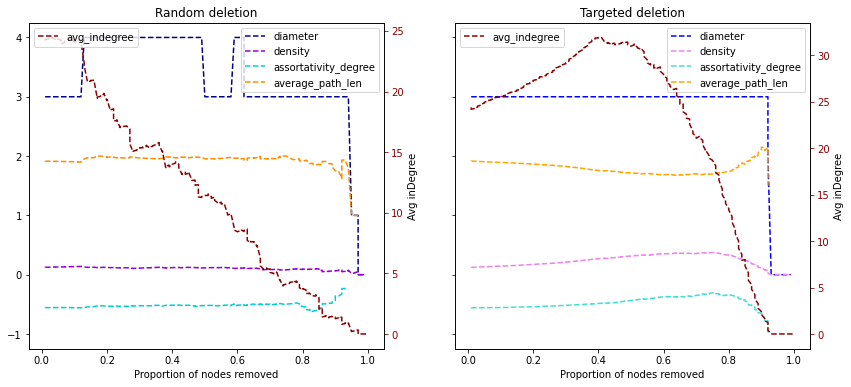

In [83]:
#Try plotting unweighted
fig, ax = plt.subplots(1,2,figsize=(14,6),sharey=True)
ax2_1 = ax[0].twinx()
ax[0].plot('prop_removed','diameter',data=df_type1_unweighted,ls='--',color='darkblue')
ax[0].plot('prop_removed','density',data=df_type1_unweighted,ls='--',color='darkviolet')
ax2_1.plot('prop_removed','avg_indegree',data=df_type1_unweighted,ls='--',color='darkred')
ax[0].plot('prop_removed','assortativity_degree',data=df_type1_unweighted,ls='--',color='darkturquoise')
ax[0].plot('prop_removed','average_path_len',data=df_type1_unweighted,ls='--',color='darkorange')
ax[0].legend(loc='upper right')
ax[0].set_xlabel('Proportion of nodes removed')
ax[0].set_title('Random deletion')
ax2_1.tick_params('y',colors='darkred')
ax2_1.set_ylabel('Avg inDegree')
ax2_1.legend(loc='upper left')

ax2_2 = ax[1].twinx()
ax[1].plot('prop_removed','diameter',data=df_type2_unweighted,ls='--',color='blue')
ax[1].plot('prop_removed','density',data=df_type2_unweighted,ls='--',color='violet')
ax2_2.plot('prop_removed','avg_indegree',data=df_type2_unweighted,ls='--',color='darkred')
ax[1].plot('prop_removed','assortativity_degree',data=df_type2_unweighted,ls='--',color='turquoise')
ax[1].plot('prop_removed','average_path_len',data=df_type2_unweighted,ls='--',color='orange')
ax[1].legend(loc='upper right')
ax[1].set_xlabel('Proportion of nodes removed')
ax[1].set_title('Targeted deletion')
ax2_2.tick_params('y',colors='darkred')
ax2_2.set_ylabel('Avg inDegree')
ax2_2.legend(loc='upper left')
plt.show()

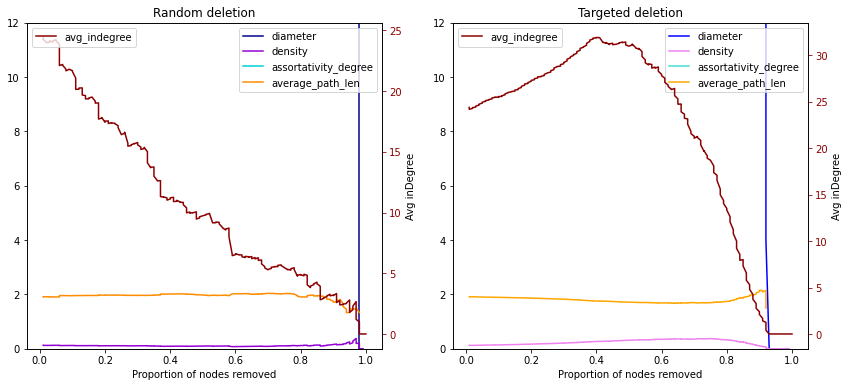

In [87]:
#Same but weighted
#Don't share y axis for type2
fig, ax = plt.subplots(1,2,figsize=(14,6),sharey=False)
ax2_1 = ax[0].twinx()
ax[0].plot('prop_removed','diameter',data=df_type1_weighted,ls='-',color='darkblue')
#set ylimit to 0 - 12 (to be same as type1; else there's a jump to 4000 for diameter)
ax[0].set_ylim([0,12])
ax[0].plot('prop_removed','density',data=df_type1_weighted,ls='-',color='darkviolet')
ax2_1.plot('prop_removed','avg_indegree',data=df_type1_weighted,ls='-',color='darkred')
ax[0].plot('prop_removed','assortativity_degree',data=df_type1_weighted,ls='-',color='darkturquoise')
ax[0].plot('prop_removed','average_path_len',data=df_type1_weighted,ls='-',color='darkorange')
ax[0].legend(loc='upper right')
ax[0].set_xlabel('Proportion of nodes removed')
ax[0].set_title('Random deletion')
ax2_1.tick_params('y',colors='darkred')
ax2_1.set_ylabel('Avg inDegree')
ax2_1.legend(loc='upper left')

ax2_2 = ax[1].twinx()
ax[1].plot('prop_removed','diameter',data=df_type2_weighted,ls='-',color='blue')
#set ylimit to 0 - 12 (to be same as type1; else there's a jump to 10000 for diameter)
ax[1].set_ylim([0,12])
ax[1].plot('prop_removed','density',data=df_type2_weighted,ls='-',color='violet')
ax2_2.plot('prop_removed','avg_indegree',data=df_type2_weighted,ls='-',color='darkred')
ax[1].plot('prop_removed','assortativity_degree',data=df_type2_weighted,ls='-',color='turquoise')
ax[1].plot('prop_removed','average_path_len',data=df_type2_weighted,ls='-',color='orange')
ax[1].legend(loc='upper right')
ax[1].set_xlabel('Proportion of nodes removed')
ax[1].set_title('Targeted deletion')
ax2_2.tick_params('y',colors='darkred')
ax2_2.set_ylabel('Avg inDegree')
ax2_2.legend(loc='upper left')
plt.show()

In [91]:
df_type2_weighted.tail(40)

,num_nodes_removed,prop_removed,node_removed,diameter,assortativity_degree,avg_indegree,density,average_path_len
156,157,0.80,Liberia,40.0,-0.339057,13.333333,0.333333,1.738265
157,158,0.81,Samoa,40.0,-0.349598,12.631579,0.323887,1.752252
158,159,0.81,Malta,40.0,-0.349374,12.054054,0.317212,1.765079
159,160,0.82,China,40.0,-0.365420,11.222222,0.303303,1.786555
160,161,0.82,Curaçao,56.0,-0.364364,10.800000,0.300000,1.795009
161,162,0.83,Hong Kong,56.0,-0.381919,10.000000,0.285714,1.818182
162,163,0.83,Cyprus,56.0,-0.400981,9.212121,0.270945,1.842742
163,164,0.84,Malaysia,56.0,-0.413629,8.562500,0.259470,1.864516
164,165,0.84,Italy,115.0,-0.430015,7.935484,0.247984,1.885057
165,166,0.85,Wyoming,129.0,-0.423671,8.000000,0.258065,1.862069
